# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 8.6208345130730990, performing 14.1 it/sec
Step 100: Loss = 0.4268043501714752, performing 157.9 it/sec
Step 200: Loss = 0.0084024531755483, performing 186.3 it/sec
No improvement since Step 203, early stopping.
[Best]  Step 202: Loss = 0.0047173036532782
[Final] Step 252: Loss = 0.0120242195687236

predicted end states
------------------------------------
         5th       Mean      95th
LF1B-1  1.50e-01  1.50e-01  1.50e-01
LF1B-2  1.29e-09  1.31e-09  1.35e-09
LF1B-3  9.66e-08  9.67e-08  9.67e-08
LF1B-4  2.18e-11  2.18e-11  2.19e-11
LF1B-5  8.61e-11  8.62e-11  8.62e-11
LF1B-6  6.75e-07  6.75e-07  6.75e-07
LF1B-7  1.41e-09  1.41e-09  1.41e-09
LF1B-8  2.74e-08  2.74e-08  2.74e-08


predicted conditional events
---------------------------------------------
                  5th       Mean      95th
LF1B             1.00e+00  1.00e+0

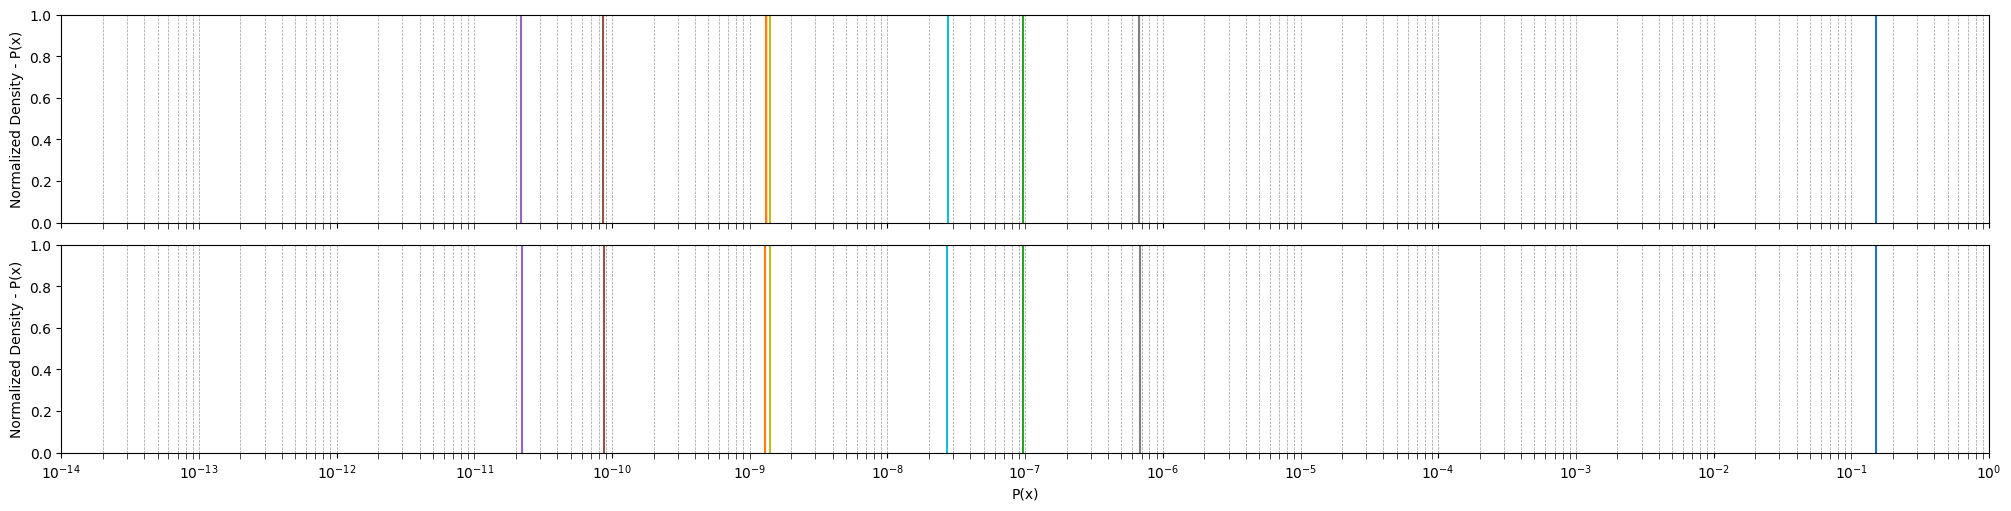

In [3]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 1.5e-1,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['LF1B', 'FSIG', 'FROD', 'PRUN', 'BPHR', 'DHRS|BPHR', 'DHRL|~BPHR', 'DHRL|~DHRS|BPHR'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    # 'LF1B-0': {
    #     'sequence': [0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    #     'probability': 1 - 1.5e-1 - 1.3e-9 - 9.65e-8 - 2.20e-11 - 8.8e-11 - 6.8e-7 - 1.4e-9 - 2.7e-8
    # },
    'LF1B-1': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, 0, np.nan],
        'probability': 1.5e-1,
    },
    'LF1B-2': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, 1, np.nan],
        'probability': 1.3e-9,
    },
    'LF1B-3': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, 0],
        'probability': 9.65e-8,
    },
    'LF1B-4': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, 1],
        'probability': 2.20e-11,
    },
    'LF1B-5': {
        'sequence': [1, 0, 0, np.nan, 1, 1, np.nan, np.nan],
        'probability': 8.8e-11,
    },
    'LF1B-6': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, np.nan, np.nan],
        'probability': 6.8e-7,
    },
    'LF1B-7': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.4e-9,
    },
    'LF1B-8': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 2.7e-8,
    },


}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)